# Gradient Descent for Linear Models
For the BUMIC gradient based learning workshop - fall 2018

## Random Model
Let's generate some random data and make a random prediction for the best fit line. As you probably expected, the prediction does not perform very well.

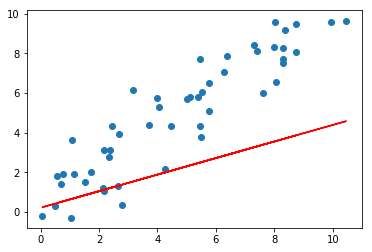

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random linear data
np.random.seed(42)
X = np.arange(0, 10, 0.2) + np.random.normal(size=50)
Y = np.arange(0, 10, 0.2) + np.random.normal(size=50)

# Hypothesize a line - just a random guess right now
h_slope, h_intercept = np.random.rand(), np.random.rand()

# Create a list of values in the hypothesized line
abline_values = [h_slope * x + h_intercept for x in X]

# View out hypothesis
plt.scatter(X, Y)
plt.plot(X, abline_values, 'r')
plt.show()

Next, let's try to update that line with gradient descent:

<img src="https://i.imgur.com/1NuyuPu.png" align="left" width="600">

Let's take a step back. Statistical learning in a nutshell approximates some data then we will need to update the weights until it's in the best possible location.
In the context of our problem our model is a line which takes the form **y = mx + b**. We want to move that line so it fits the data really well, and we move the line by changing **m** and **b** so those are our weights! They will be known as **theta_1** and **theta_0** respectively.

With our model defined in terms of the weights we discussed aboved, it is time to choose a loss function to minimize. We will use the **least square error** loss function:

<img src="https://i.imgur.com/pLo1b6K.png" width=400 align="left"/>

Notice how we are summing the difference between each prediction and the ground truth label which you can think of as the total sum of the error of every predicition in our dataset.

## Mini-Batch Gradient Descent
Now let's implement Mini-Batch Gradient Descent!
Notice that *if we set the batch size to be equal to the size of the dataset, it becomes vanilla gradient descent*. On the other end of the spectrum, *setting the batch size equal to 1 turns the algorithm into stochastic gradient descent*.


### Hyperparameters
Feel free to play around with these values to see how they affect the loss.

In [3]:
EPOCHS = 100 # complete iterations over the dataset
LEARNING_RATE = 0.001 # how big our step is

### Implementation

In [7]:
class BatchGradientDescent:
    def theta_1_grad(self, inputs, preds, labels):
        dif = preds - labels
        return (1/len(inputs)) * sum(np.multiply(dif, inputs))

    def theta_0_grad(self, preds, labels):
        return (1/len(preds)) * sum((preds - labels) * 1)


class BatchLinearModel:
    def __init__(self, batch_size, optimizer, theta_0, theta_1):
        self.batch_size = batch_size
        self.optim = optimizer
        self.losses = []
        self.theta_0 = theta_0
        self.theta_1 = theta_1
    
    def generate_batch_indices(self, data_length):
        # We shuffle the order the batches are passed in to reduce bias in the training algorithm;
        # We don't want the algorithm to learn a superficial ordering of batches
        batch_indices = np.arange(0, data_length, self.batch_size)
        return np.random.permutation(batch_indices)
    
    def train(self, X, Y, epochs, learning_rate):
        # epochs - iterations over the entire dataset
        for epoch_i in range(epochs):
            for i in self.generate_batch_indices(len(X)): #range(0,len(X), self.batch_size):
                inputs = X[i:i+self.batch_size]
                labels = Y[i:i+self.batch_size]
                
                # make a prediction
                pred = self.predict(inputs)
                loss = np.mean(self.loss_fn(pred, labels))

                # update weights
                self.theta_1 -= learning_rate * self.optim.theta_1_grad(inputs, pred, labels)
                self.theta_0 -= learning_rate * self.optim.theta_0_grad(pred, labels)
            self.losses.append(loss)
    
    def loss_fn(self, pred, y):
        return (1/2)*(pred - y)**2 # We want to minimize this
            
    def predict(self, inputs):
        pred = np.multiply(self.theta_1, inputs) + self.theta_0
        return pred
            
    def show_loss(self):
        plt.plot(self.losses)
        plt.show()
        
    def get_current_loss(self):
        return self.losses[-1]
    
    def print_current_parameters(self):
        print('theta 1:', self.theta_1, 'theta 0:', self.theta_0)
    
    def view_model_predictions(self, X, Y):
        # Create a list of values in the learned line
        abline_values = [self.theta_1*x+self.theta_0 for x in X]

        # View out hypothesis
        plt.scatter(X, Y)
        plt.plot(X, abline_values, 'r')
        plt.show()

### Batch/Vanillia Gradient Descent
We use the whole dataset for just one update. *Batch size if the length of the dataset*

Loss with Batch/Vanilla GD:


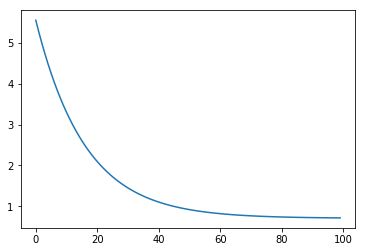

Predictions from Batch/Vanilla GD:


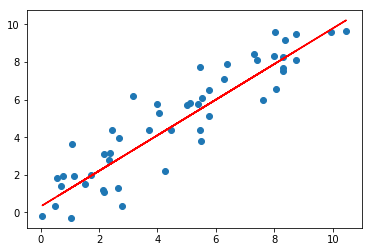

theta 1: 0.9470321847716716 theta 0: 0.3116317732978796
Final Loss: 0.7136377689286708


In [13]:
bgd_batch_size = len(X) # length of the dataset
optim_bgd = BatchGradientDescent()
model_bgd = BatchLinearModel(bgd_batch_size, optim_bgd, h_intercept, h_slope)

model_bgd.train(X, Y, EPOCHS, LEARNING_RATE)
print('Loss with Batch/Vanilla GD:')
model_bgd.show_loss()
print('Predictions from Batch/Vanilla GD:')
model_bgd.view_model_predictions(X, Y)
model_bgd.print_current_parameters()
print('Final Loss:', model_bgd.get_current_loss())

### Stochastic Gradient Descent
We use one training example for one update. *Batch size is one and the dataset is randomly shuffled*

Loss with Stochastic GD:


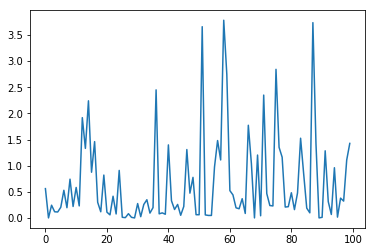

Predictions from Stochastic GD:


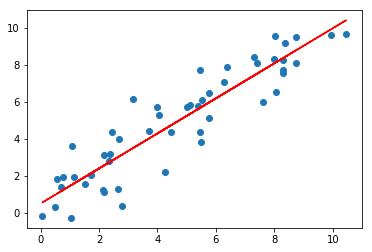

theta 1: 0.9498948127389709 theta 0: 0.4859650476753935
Final Loss: 1.4261293262832881


In [15]:
sgd_batch_size = 1 # just one example per update
optim_sgd = BatchGradientDescent()
model_sgd = BatchLinearModel(sgd_batch_size, optim_sgd, h_intercept, h_slope)

model_sgd.train(X, Y, EPOCHS, LEARNING_RATE)
print('Loss with Stochastic GD:')
model_sgd.show_loss()
print('Predictions from Stochastic GD:')
model_sgd.view_model_predictions(X, Y)
model_sgd.print_current_parameters()
print('Final Loss:', model_sgd.get_current_loss())

Loss with Mini-batch GD:


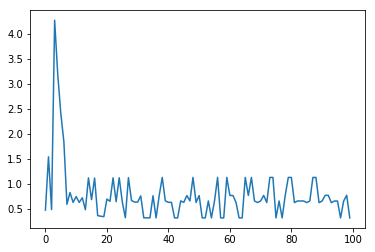

Predictions from Mini-batch GD:


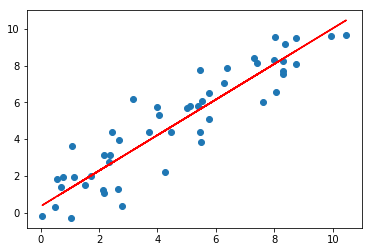

theta 1: 0.9681394339443777 theta 0: 0.33868730916604706
Final Loss: 0.3223029275567365


In [16]:
mbgd_batch_size = 10 # try playing around with this value to see how it affects the loss
optim_mbgd = BatchGradientDescent()
model_mbgd = BatchLinearModel(mbgd_batch_size, optim_bgd, h_intercept, h_slope)

model_mbgd.train(X, Y, EPOCHS, LEARNING_RATE)
print('Loss with Mini-batch GD:')
model_mbgd.show_loss()
print('Predictions from Mini-batch GD:')
model_mbgd.view_model_predictions(X, Y)
model_mbgd.print_current_parameters()
print('Final Loss:', model_mbgd.get_current_loss())

### We did it!
Congratulations, you just taught a machine to learn using three types of gradient descent!